### Example usage of Pathcensus library

In [1]:
# Main imports used in the examples below
import random
import numpy as np
import networkx as nx
import igraph as ig
from pathcensus import PathCensus

# Set random and numpy rng seeds
random.seed(303)
np.random.seed(101)


In [2]:
G = ig.Graph.Erdos_Renyi(100, p=0.05, directed=False)


In [3]:
P = PathCensus(G)


![](https://raw.githubusercontent.com/sztal/pathcensus/master/docs/figures/sim.svg)

![](https://raw.githubusercontent.com/sztal/pathcensus/master/docs/figures/comp.svg)

* t = triangles
* tw = wedge triples around i
* th = head triples originating from i

* q0 = strong quadrangles
* qw wedge-quadruples around i
* qh head-quadruples originating from i

In [4]:
P.census("edges")


t  tw  th  q0  qw  qh
i  j                        
0  22  0   3   5   1  19  21
   23  0   3   9   2  15  37
   88  0   3   6   3  18  26
   99  0   3   4   2  20  15
1  55  1   2   4   0   9  17
...   ..  ..  ..  ..  ..  ..
99 0   0   4   3   2  15  20
   24  0   4   6   0  12  22
   29  0   4   4   1  14  18
   40  1   4   2   0  15   5
   77  1   4   3   1  14  17

[478 rows x 6 columns]

In [5]:
P.census("global")


,t,tw,th,q0,qw,qh
0,20,1083,1083,52,4859,4859


In [6]:
P.tclust()


i
0     0.000000
1     0.333333
2     0.083333
3     0.000000
4     0.000000
        ...   
95    0.000000
96    0.000000
97    0.166667
98    0.000000
99    0.100000
Length: 100, dtype: float64

In [7]:
# Similarity coefficients
P.tclust()  # triangle-clustering equivalent to local clustering coefficient
P.tclosure()  # triangle-closure equivalent to local closure coefficient
P.similarity()  # structural similarity (weighted average of clustering and closure)

# Edge-wise similarity
P.similarity("edges")


i   j 
0   22    0.000000
    23    0.000000
    88    0.000000
    99    0.000000
1   55    0.333333
            ...   
99  0     0.000000
    24    0.000000
    29    0.000000
    40    0.333333
    77    0.285714
Length: 478, dtype: float64

In [8]:
# Global similarity (equivalent to global clustering coefficient)
P.similarity("global")


0.055401662049861494

## With networkx

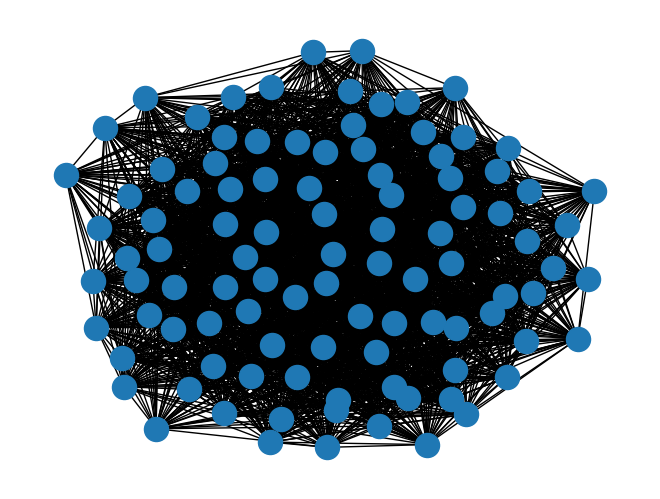

In [9]:
g = nx.erdos_renyi_graph(100, 0.5)
nx.draw(g)


In [10]:
g_adj = nx.to_numpy_array(g)
g_adj


array([[0., 0., 1., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [11]:
P = PathCensus(g_adj)


In [12]:
P.census("edges")


t  tw  th   q0    qw    qh
i  j                              
0  2   27  48  51  252  2355  2510
   3   22  48  42  276  2369  2059
   6   25  48  48  255  2360  2375
   7   27  48  55  289  2351  2725
   10  28  48  57  281  2348  2820
...    ..  ..  ..  ...   ...   ...
99 90  22  51  52  437  2490  2570
   91  24  51  57  433  2483  2799
   94  22  51  42  301  2500  2055
   96  23  51  50  394  2491  2478
   98  26  51  54  355  2484  2658

[5026 rows x 6 columns]

In [13]:
P.similarity("global")


0.5078552049236088